In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn import tree

In [2]:
fraud = pd.read_csv("Fraud_check.csv")
fraud.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [3]:
# creating an empty column called income_30k, the assiging 0 and 1 based on if else condition
fraud.loc[fraud["Taxable.Income"]>=30000,"income_30k"]="0" # people with income more or equal to 30000
fraud.loc[fraud["Taxable.Income"]< 30000,"income_30k"]="1" # people with income less than 30000
#dropping Taxable.Income from fraud df
fraud.drop(['Taxable.Income','City.Population'],axis=1,inplace= True )

In [4]:
#label encoding object columns

le = preprocessing.LabelEncoder()
for i in fraud.columns:
    if fraud[i].dtype == object:
        fraud[i] = le.fit_transform(fraud[i])
    else:
        pass

    

In [5]:
fraud.head()

,Undergrad,Marital.Status,Work.Experience,Urban,income_30k
0,0,2,10,1,0
1,1,0,18,1,0
2,0,1,30,1,0
3,1,2,15,1,0
4,0,1,28,0,0


In [6]:
fraud['income_30k'].value_counts() #getting unique values of income less than 30k and more than 30k

0    476
1    124
Name: income_30k, dtype: int64

## Inference: here we can see that the data is not balanced so it is likely that the model will perdict the people with income >= 30000 in a way better manner than < 30000.

In [7]:
# Splitting the dataset into x and y 
x = fraud.iloc[:,0:4]
y = pd.DataFrame(fraud.iloc[:,4])

In [8]:
fraud.columns

Index(['Undergrad', 'Marital.Status', 'Work.Experience', 'Urban',
       'income_30k'],
      dtype='object')

In [9]:
# Splitting dataset into test and train
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.2,random_state = 40)

### Fitting Gridsearch model first to find out optimal criteria and maximum depth.


In [10]:
from sklearn.model_selection import GridSearchCV

## Configuring parameters and values for searched
tuned_parameters = [{'criterion': ['gini', 'entropy'],'max_depth': [10, 15],
                     'n_estimators': [10,20],
                     'max_features': ['sqrt', 0.2]}]
                     
## Initializing the RF classifier
radm_clf = RandomForestClassifier()
## Configuring search with the tunable parameters
clf = GridSearchCV(radm_clf,
                   tuned_parameters,
                   cv=5,
                   scoring='roc_auc')
## Fitting the training set
clf.fit(x_train, y_train)


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y wa

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y wa

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y wa

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': [10, 15], 'max_features': ['sqrt', 0.2],
                          'n_estimators': [10, 20]}],
             scoring='roc_auc')

In [11]:
clf.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=15, max_features=0.2,
                       n_estimators=20)

In [12]:
clf.best_index_

15

In [13]:
clf.best_score_

0.45679511278195484

##### we can see that the roc auc score for this model is not that good, and even though this is the best score.

#### So we can see that using Gridsearch, we got that the best estimator is entropy using max_depth = 10, so now fittng it with Random forest  model 

## Fitting RF entropy model


In [14]:
clf_RF_entropy = RandomForestClassifier(max_depth=10, max_features='sqrt',
                       n_estimators=10)


In [15]:
clf_RF_entropy.fit(x_train,y_train)
results = cross_val_score(clf_RF_entropy, x, y)
print(results.mean())

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


0.685


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


In [16]:
##Prediciton on test data 
y_pred = pd.DataFrame(clf_RF_entropy.predict(x_test))

In [17]:
y_pred

,0
0,0
1,0
2,0
3,0
4,0
...,...
115,1
116,0
117,0
118,0


In [18]:
from sklearn.metrics import roc_auc_score,confusion_matrix,classification_report
roc_auc_score(y_test,y_pred) # accuracy score from test data

0.5007763975155279

### From ROC AUC score we can say that the test accuracy is  0.46 which is also not that good.

In [19]:
confusion_matrix(y_test,y_pred) # confusion matrix to predict true positives and false positives

array([[79, 13],
       [24,  4]])

### We can see that the model was able to identify true positives correctly in a better manner than true negatives.


In [20]:
print(classification_report(y_test,y_pred)) # classification report

              precision    recall  f1-score   support

           0       0.77      0.86      0.81        92
           1       0.24      0.14      0.18        28

    accuracy                           0.69       120
   macro avg       0.50      0.50      0.49       120
weighted avg       0.64      0.69      0.66       120



## getting the most important features

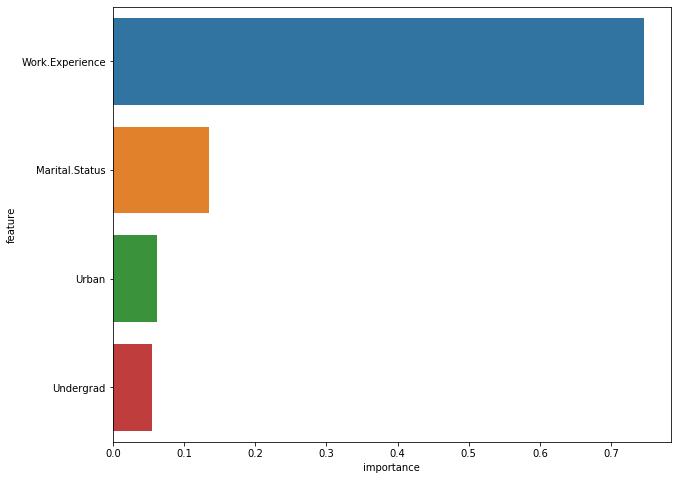

In [21]:
import seaborn as sns
# Create a dataframe to store the features and their corresponding
# importances
feature_rank = pd.DataFrame( { 'feature': x_train.columns,
                               'importance': clf_RF_entropy.feature_importances_ } )
## Sorting the features based on their importances with most
## important feature at top.
feature_rank = feature_rank.sort_values('importance', ascending = False)


plt.figure(figsize=(10,8))
sns.barplot( y = 'feature', x = 'importance', data = feature_rank );

### Conclusion

#### We can see that the model was not able to identify any true negatives or any people with income less than 30000.
#### This is mainly due to unbalanced dataset as we can from the first value count function that  the percentage of people with income less than 30000 is less than the people with income more than 30000.